In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
#The dataset contains no header for columns, hence the header parameter
train=pd.read_csv('./mitbih_train.csv',header=None)
test=pd.read_csv('./mitbih_test.csv',header=None)

In [3]:
#Last column is the category column, a scaler value from 0 to 4
y_train=train[train.columns[-1:]]
x_train=train[train.columns[:-1]]
y_test=test[test.columns[-1:]]
x_test=test[test.columns[:-1]]

In [4]:
print(len(y_train[y_train[187] ==0 ]))
print(len(y_train[y_train[187] ==1 ]))
print(len(y_train[y_train[187] ==2 ]))
print(len(y_train[y_train[187] ==3 ]))
print(len(y_train[y_train[187] ==4 ]))

72471
2223
5788
641
6431


In [5]:
# Balances the dataset by oversampling it (it seems like it uses interpolation)
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
oversampler=SMOTE()
x_train,y_train=oversampler.fit_resample(x_train,y_train)

In [6]:
print(len(y_train[y_train[187] ==0 ]))
print(len(y_train[y_train[187] ==1 ]))
print(len(y_train[y_train[187] ==2 ]))
print(len(y_train[y_train[187] ==3 ]))
print(len(y_train[y_train[187] ==4 ]))

72471
72471
72471
72471
72471


In [7]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Change the value to only use a subset of the dataset (like for quick tests...)
x_train=x_train[:362355][:][:]
y_train=y_train[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,187,1])

In [8]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Change the value to only use a subset of the dataset (like for quick tests...)
x_test=x_test[:362355][:][:]
y_test=y_test[:362355][:]
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,187,1])

In [9]:
model=tf.keras.Sequential([
    layers.Conv1D(7, 7, activation='relu', input_shape=(187,1)),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(5,5,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(3,3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(5,activation='softmax') #softmax cuz categories
])

In [12]:
model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy']) #this was with validation
history=model.fit(x_train,y_train,batch_size=1000,epochs=15,verbose=True)

Epoch 1/15
363/363 [==============================] - 35s 93ms/step - loss: 0.2430 - accuracy: 0.9167
Epoch 2/15
363/363 [==============================] - 33s 91ms/step - loss: 0.1543 - accuracy: 0.9497
Epoch 3/15
363/363 [==============================] - 40s 111ms/step - loss: 0.1179 - accuracy: 0.9622
Epoch 4/15
363/363 [==============================] - 40s 111ms/step - loss: 0.0990 - accuracy: 0.9684
Epoch 5/15
363/363 [==============================] - 40s 110ms/step - loss: 0.0869 - accuracy: 0.9724
Epoch 6/15
363/363 [==============================] - 33s 90ms/step - loss: 0.0782 - accuracy: 0.9754
Epoch 7/15
363/363 [==============================] - 29s 79ms/step - loss: 0.0719 - accuracy: 0.9774
Epoch 8/15
363/363 [==============================] - 35s 96ms/step - loss: 0.0666 - accuracy: 0.9787
Epoch 9/15
363/363 [==============================] - 42s 116ms/step - loss: 0.0620 - accuracy: 0.9806
Epoch 10/15
363/363 [==============================] - 38s 104ms/step - loss: 

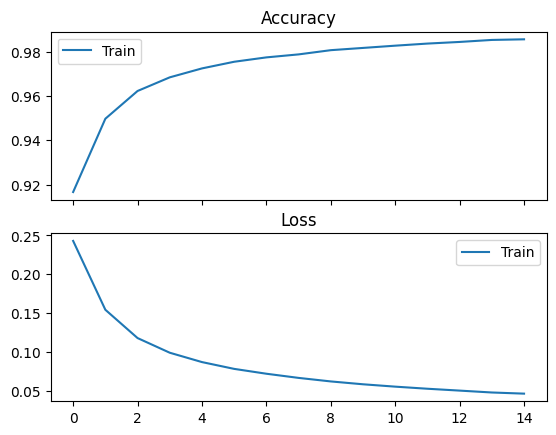

In [14]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
# ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
# ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [15]:
model.evaluate(x_test, y_test, verbose=True)

685/685 [==============================] - 5s 7ms/step - loss: 0.1644 - accuracy: 0.9572


[0.1644069105386734, 0.9572446346282959]